## **Comprehensive EDA for Diabetes Dataset**

## **Import libraries**

In [ ]:
import kagglehub
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.style.use("dark_background")

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
custom_path = os.path.join("..", "data")
os.makedirs(custom_path, exist_ok=True)

In [4]:
# Download dataset
dataset_path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("✅ Dataset downloaded to temporary path:", dataset_path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 7.74MB/s]

Extracting files...
✅ Dataset downloaded to temporary path: /home/muhammad/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [5]:
# Move files to custom path
for item in os.listdir(dataset_path):
    src = os.path.join(dataset_path, item)
    dst = os.path.join(custom_path, item)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dst)
    print(f"Moved {item} to {dst}")

Moved diabetes.csv to ../data/diabetes.csv


In [6]:
# Load dataset
csv_file = os.path.join(custom_path, "diabetes.csv")
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"CSV file not found in {custom_path}. Check dataset contents.")
data = pd.read_csv(csv_file)
print(f"✅ Dataset loaded from: {csv_file}")

✅ Dataset loaded from: ../data/diabetes.csv


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Basic Dataset Information**

In [8]:
print("\n=== Dataset Overview ===")
print("Shape:", data.shape)


=== Dataset Overview ===
Shape: (768, 9)


In [9]:
print("Columns:")
data.columns.tolist()

Columns:


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
print("Data Types:\n")
data.dtypes

Data Types:



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
print("Missing Values:\n")
data.isnull().sum()

Missing Values:



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
print("Summary Statistics:\n")
data.describe()

Summary Statistics:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Check for invalid zeros (potential missing values)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero Values (Potential Missing Data):")
for col in zero_cols:
    zero_count = (data[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/data.shape[0]:.2%})")


Zero Values (Potential Missing Data):
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


In [14]:
print("\n=== Class Distribution ===")
class_counts = data['Outcome'].value_counts()
class_proportions = data['Outcome'].value_counts(normalize=True)
print("Counts:\n")
class_counts


=== Class Distribution ===
Counts:



Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
print("Proportions:\n")
class_proportions

Proportions:



Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

## **Count Plot for Outcome**
- Purpose: Show class imbalance (if any).

/tmp/ipykernel_22443/868259605.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='Set2')


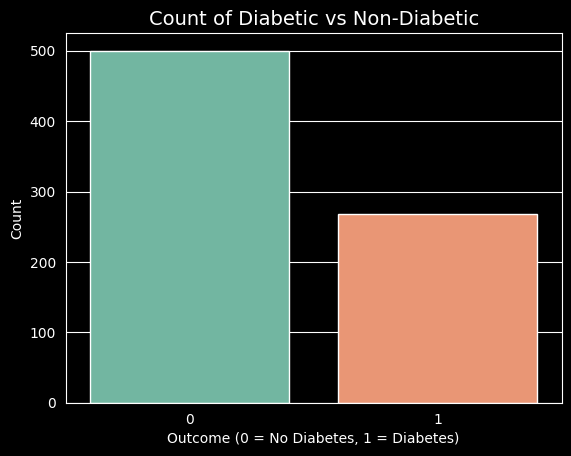

In [16]:
sns.countplot(x='Outcome', data=data, palette='Set2')
plt.title("Count of Diabetic vs Non-Diabetic", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

## **Distribution Plots (Univariate Analysis)**
- Purpose: Understand the distribution of each numerical variable.

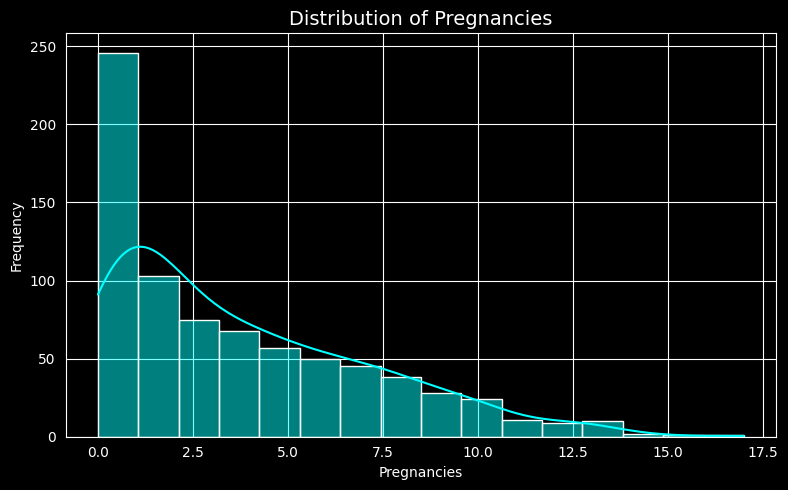

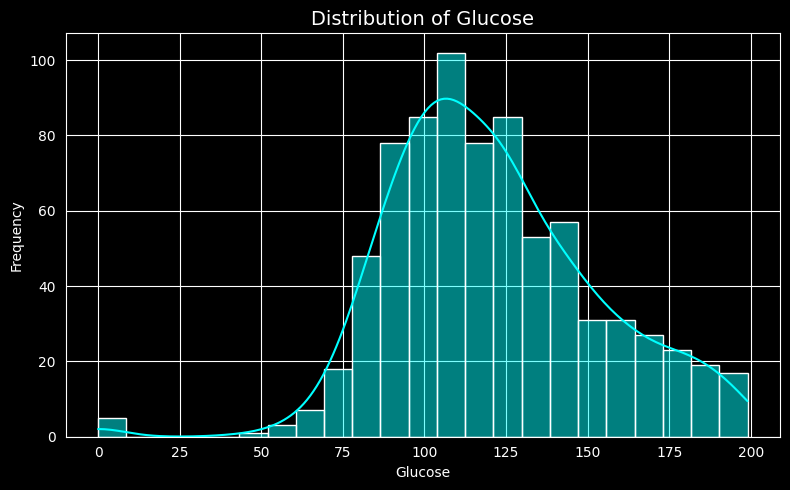

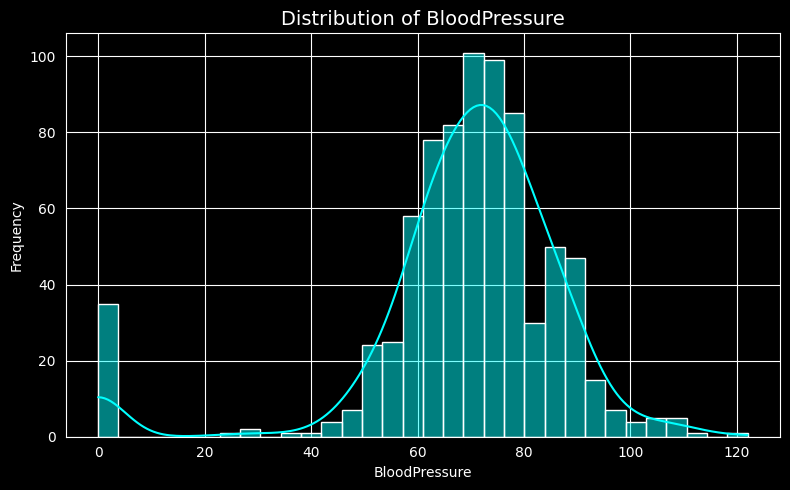

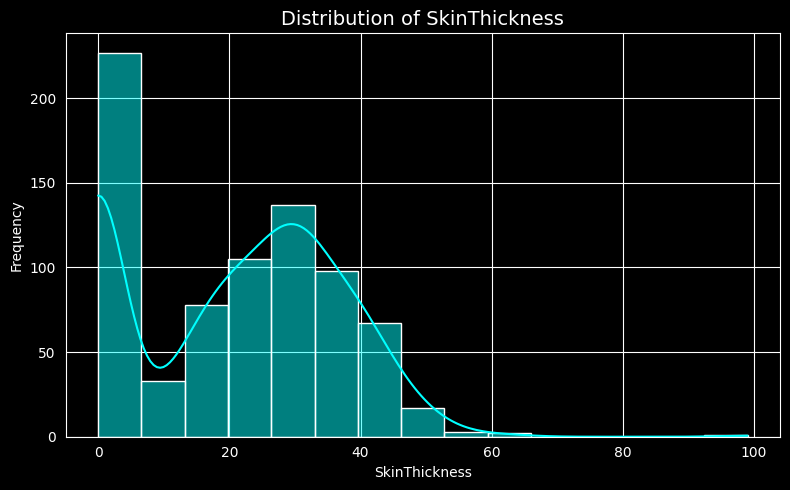

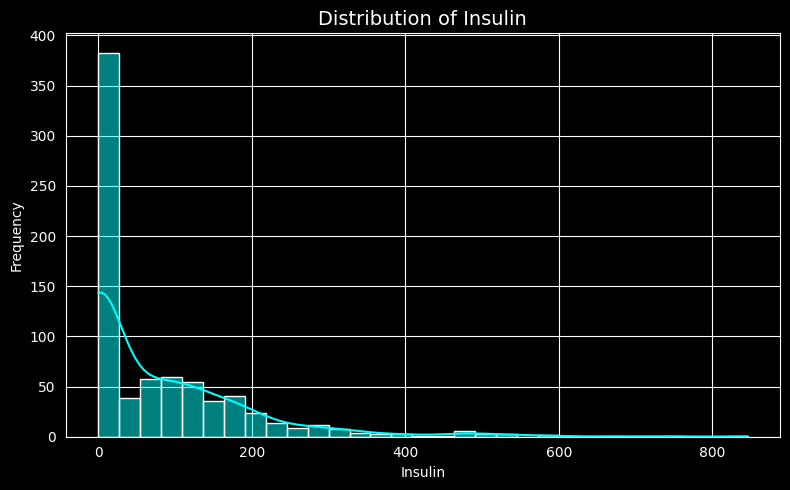

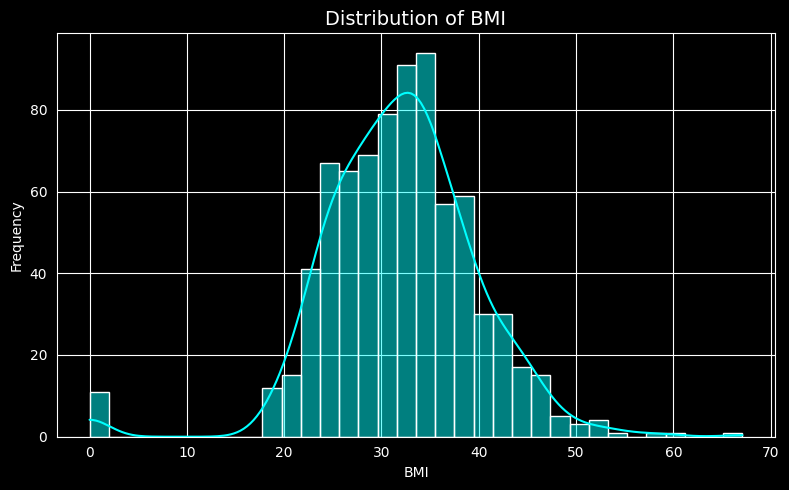

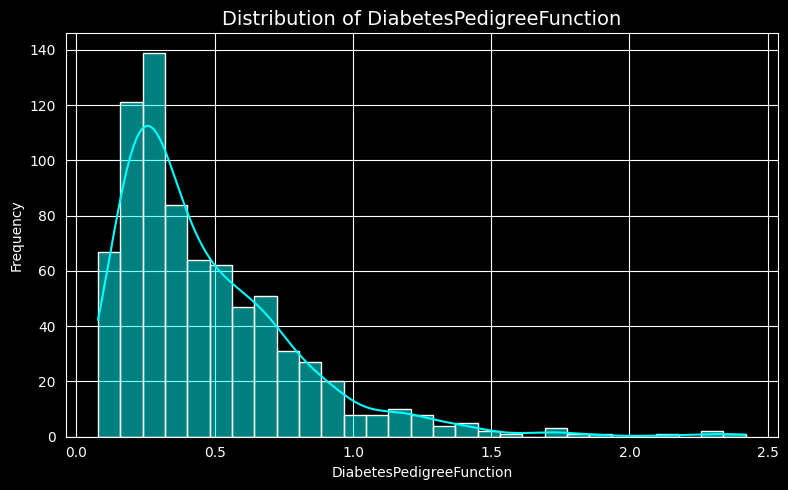

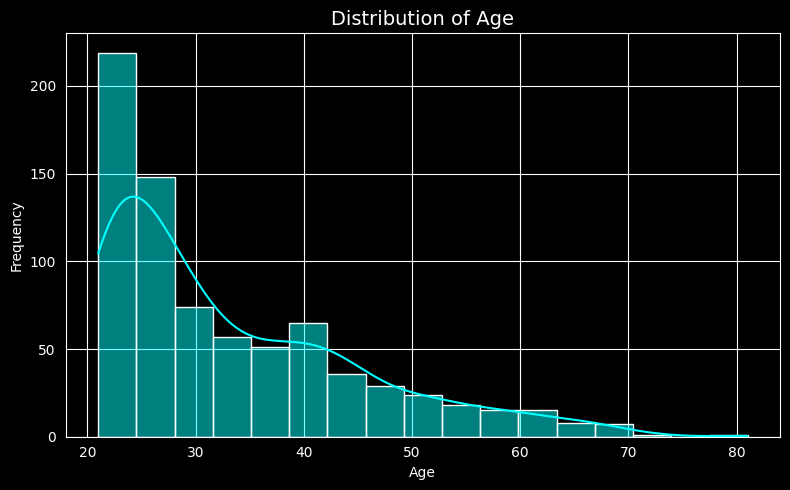

In [17]:
numeric_cols = data.columns[:-1]  # All except 'Outcome'

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, color='cyan', edgecolor='white')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## **Box Plots (Outlier Detection)**
- Purpose: Detect outliers and understand spread.

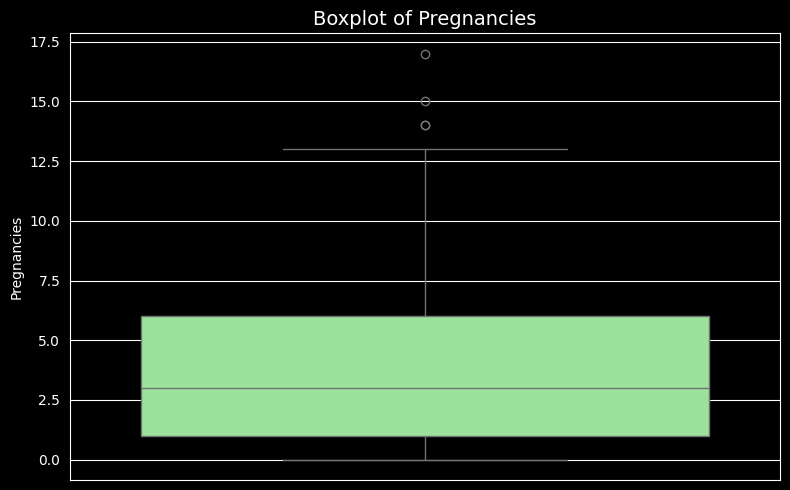

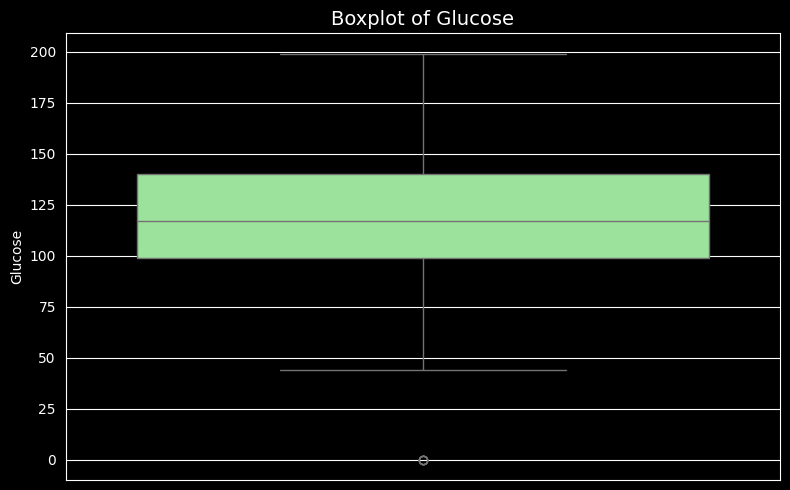

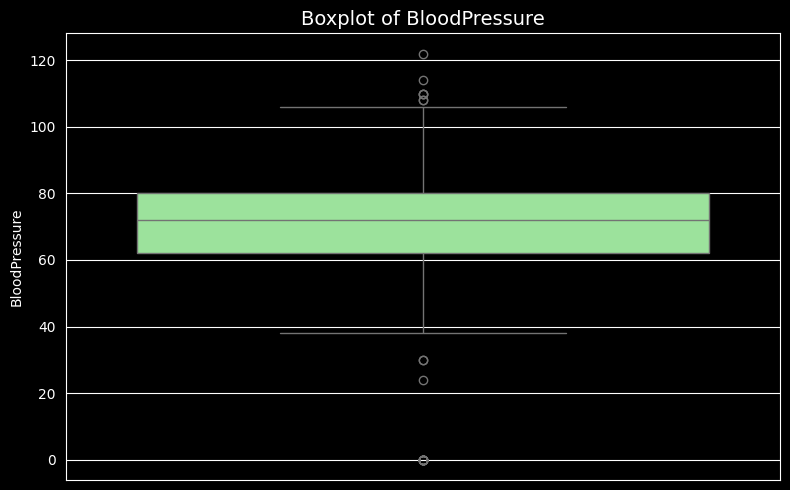

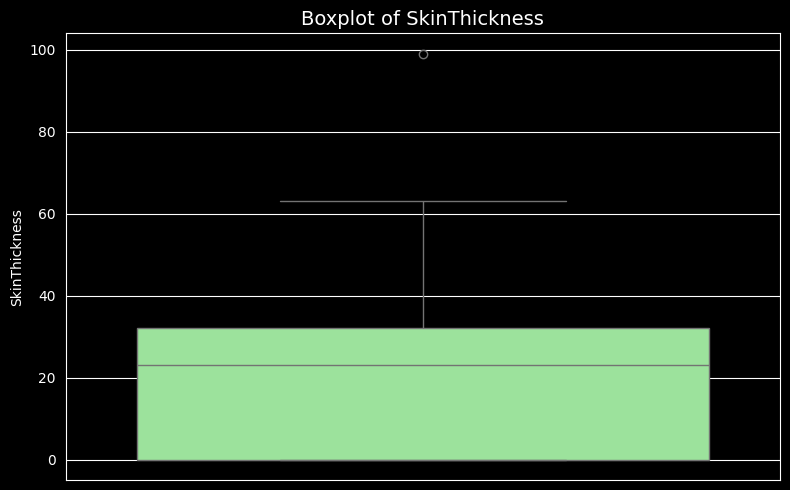

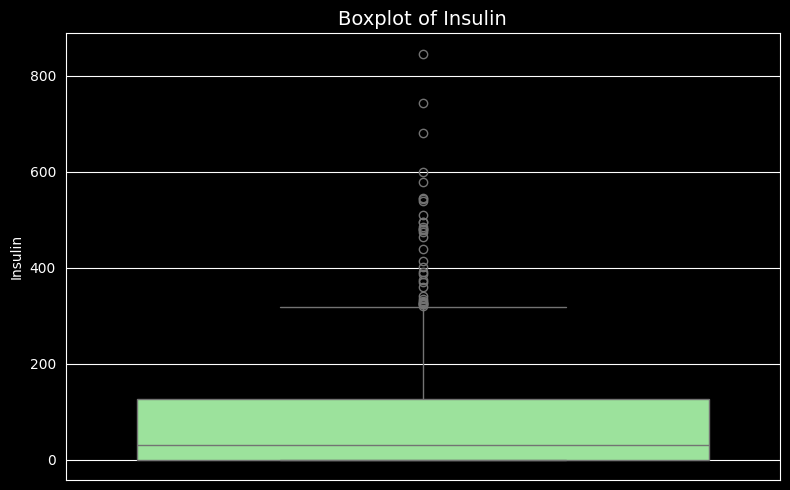

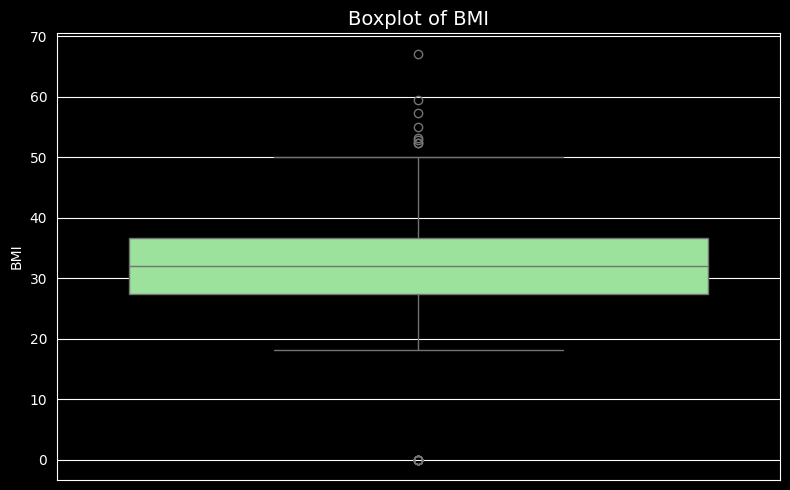

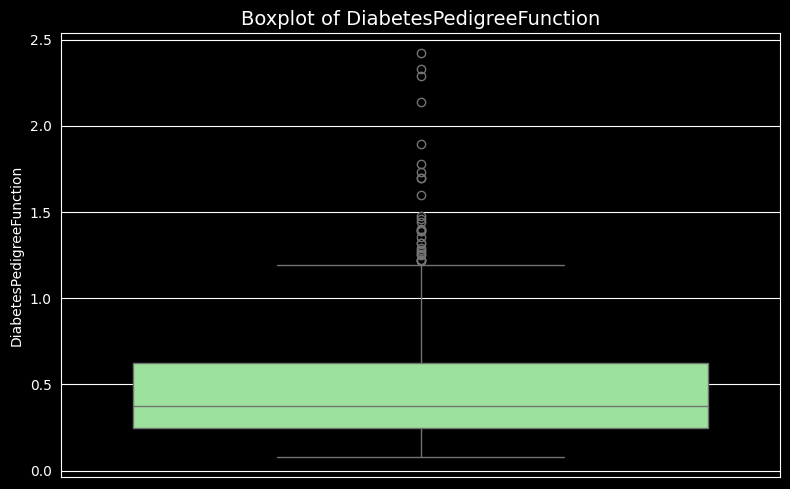

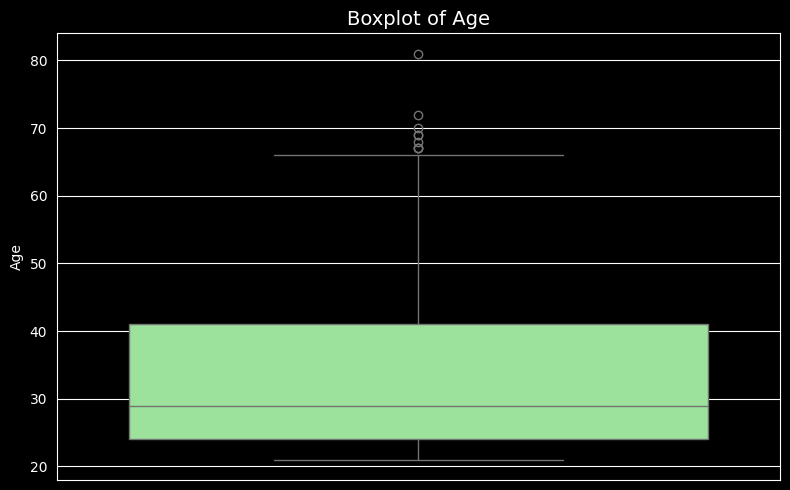

In [18]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.tight_layout()
    plt.show()

## **Pair Plot (Multivariate Distribution)**

- Purpose: Visualize pairwise relationships in the dataset with Outcome hue.

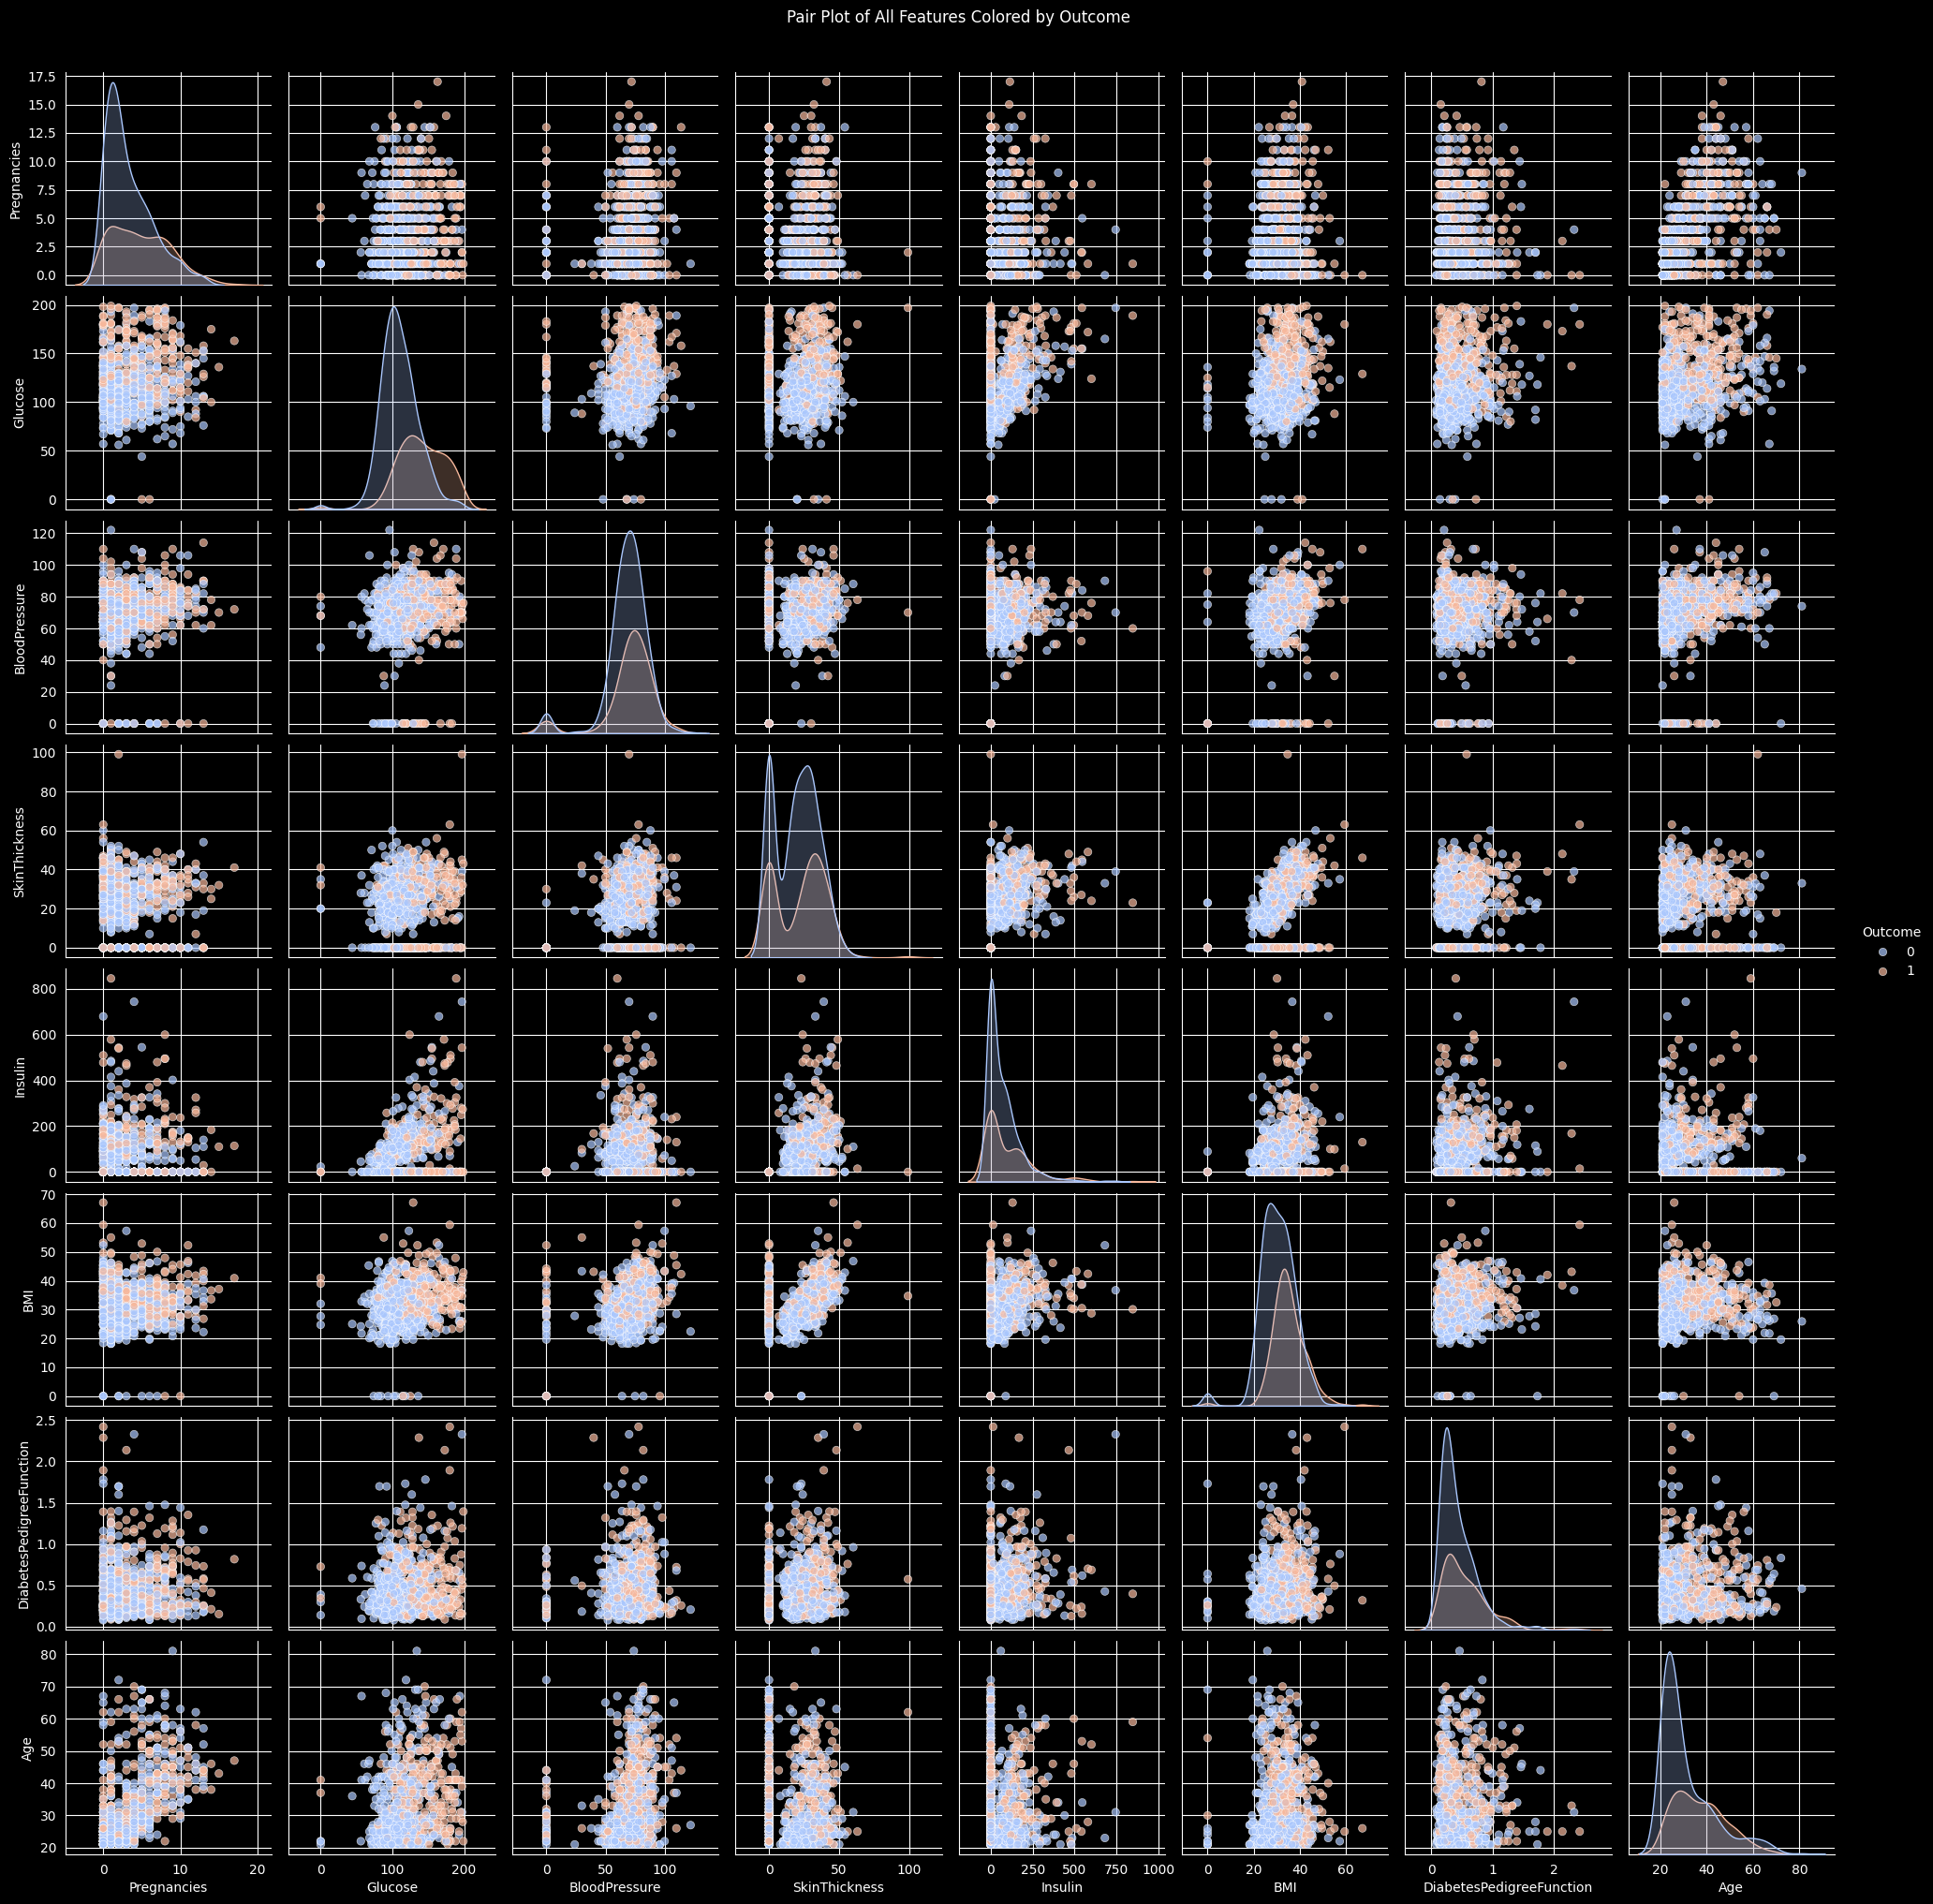

In [19]:
sns.pairplot(data, hue='Outcome', palette='coolwarm', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of All Features Colored by Outcome", y=1.02)
plt.show()

## **Correlation Heatmap**
- Purpose: Understand relationships between numeric features.

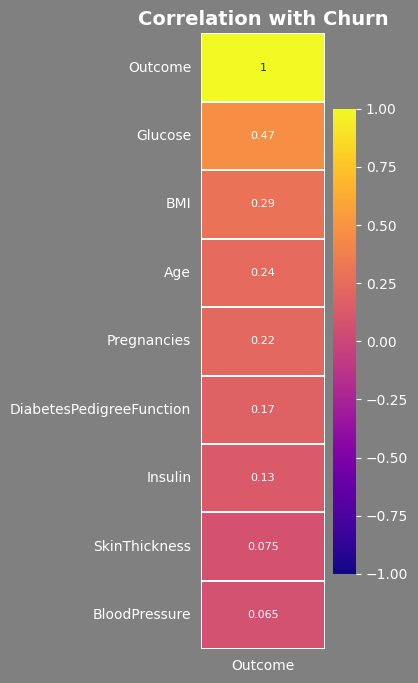

In [20]:
diabetes_corr = data.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)
plt.figure(figsize=(2, 8), facecolor='gray')
sns.heatmap(
    diabetes_corr,
    vmax=1,
    vmin=-1,
    cmap='plasma',
    annot=True,
    annot_kws={"size": 8},
    linewidths=0.1,
    cbar_kws={"orientation": "vertical", "shrink": 0.8}  )

plt.title("Correlation with Churn", fontsize=14, fontweight='bold', color='white')
plt.gca().set_facecolor('lightgray')
plt.show()

## **Violin Plots by Outcome**
- Purpose: Compare distributions for each feature across Outcome classes.

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


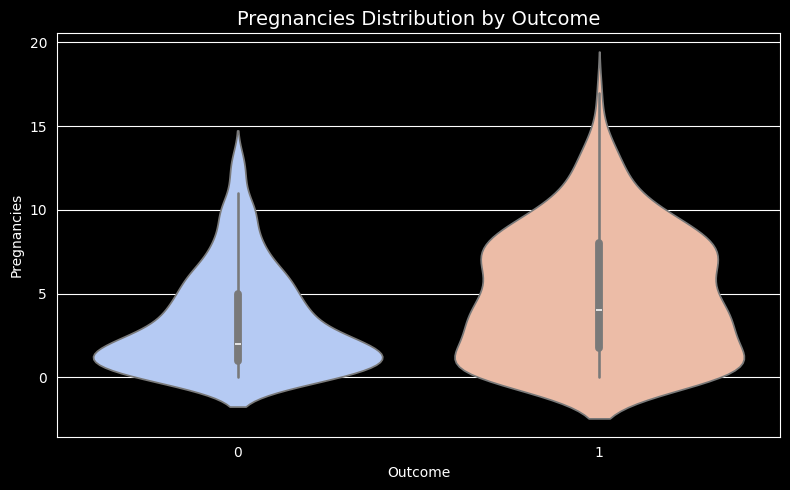

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


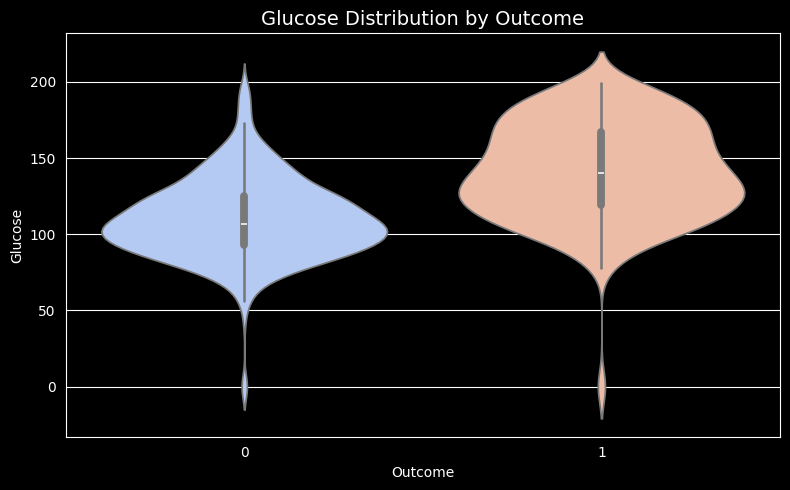

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


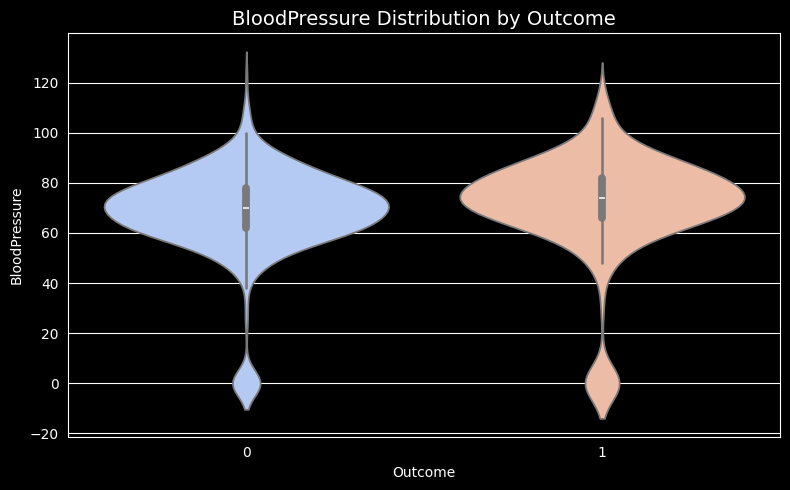

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


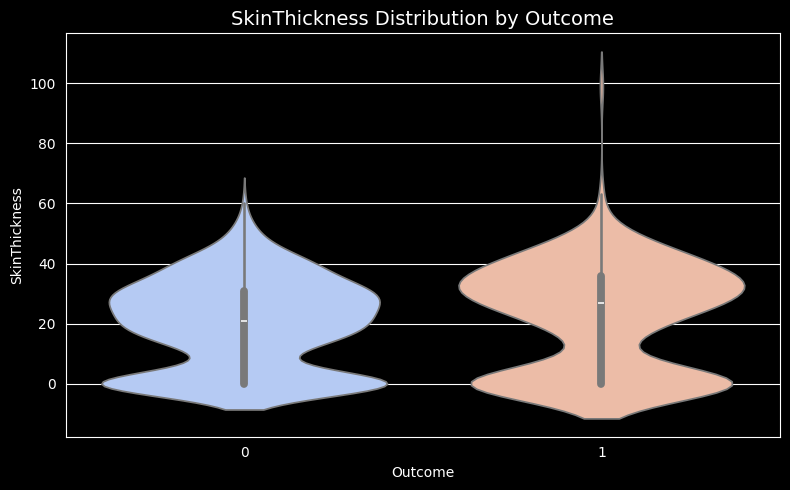

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


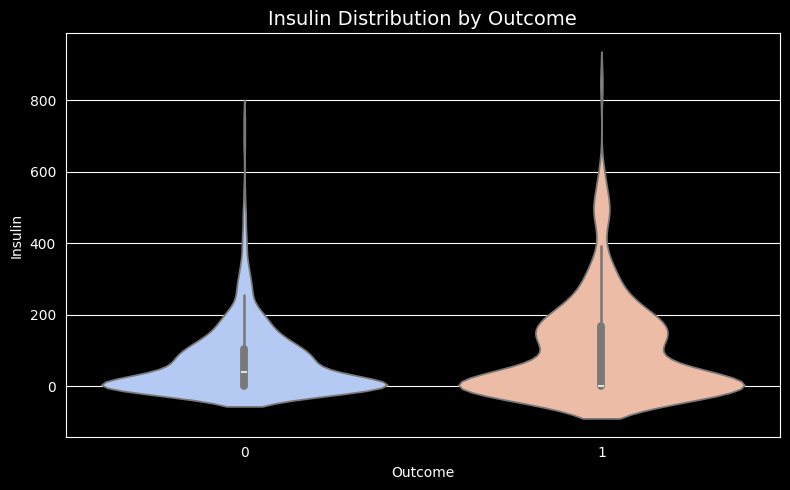

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


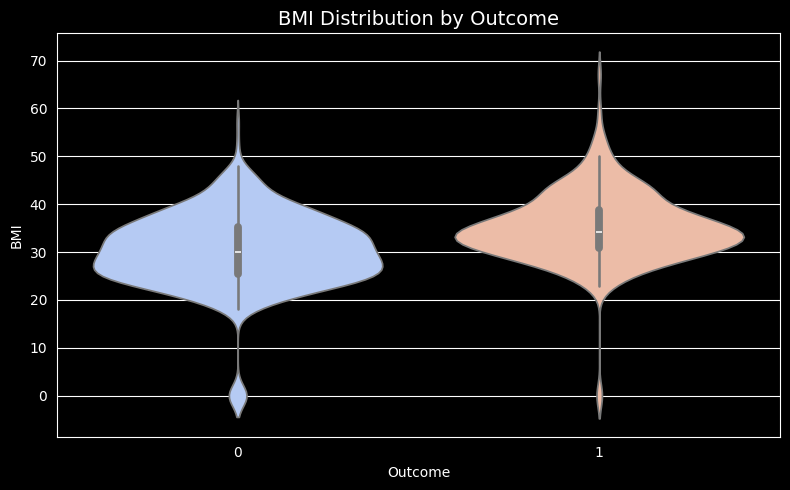

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


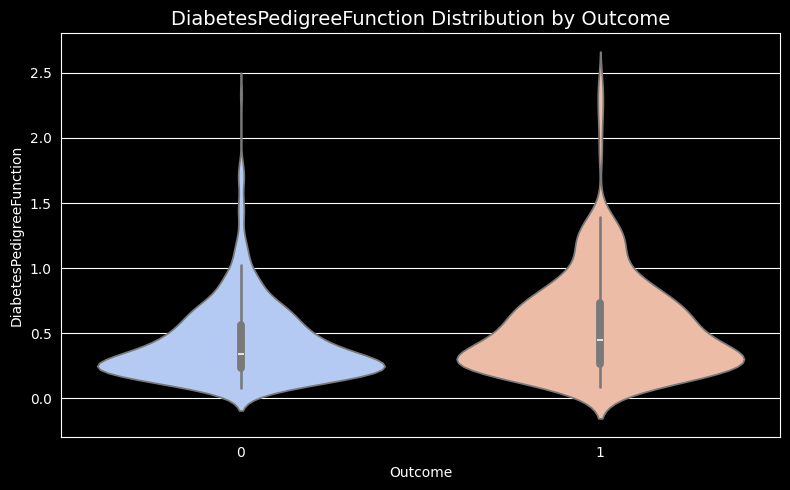

/tmp/ipykernel_22443/870814389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')


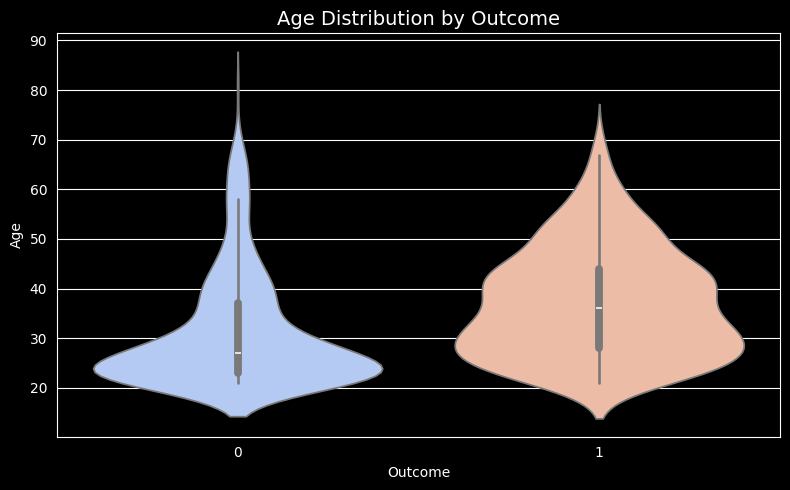

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Outcome', y=col, data=data, palette='coolwarm')
    plt.title(f'{col} Distribution by Outcome', fontsize=14)
    plt.tight_layout()
    plt.show()

## **Age Group Analysis with Outcome**
- Purpose: Bucket age and examine diabetes occurrence.

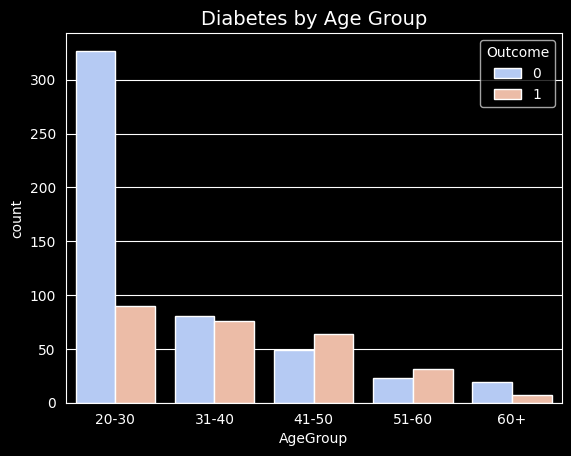

In [22]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 80],
                        labels=["20-30", "31-40", "41-50", "51-60", "60+"])
sns.countplot(x='AgeGroup', hue='Outcome', data=data, palette='coolwarm')
plt.title("Diabetes by Age Group", fontsize=14)
plt.show()

## **Scatter Plot Matrix (Customized)**
- Purpose: Show specific interactions between features (like Glucose vs BMI).

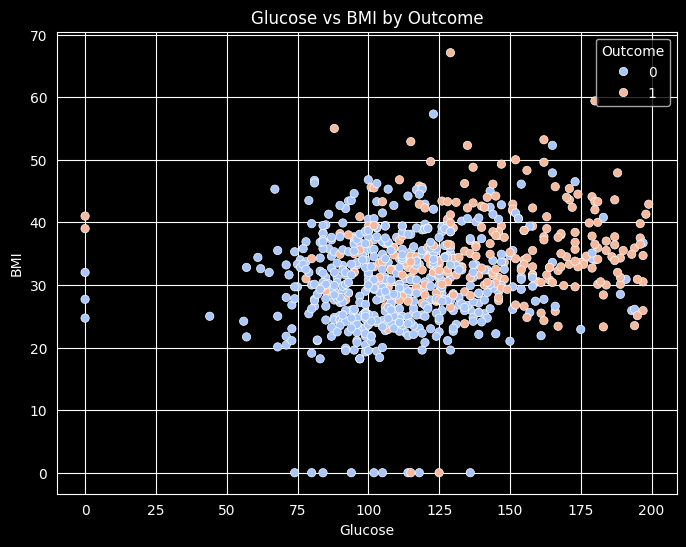

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Outcome', palette='coolwarm')
plt.title('Glucose vs BMI by Outcome')
plt.show()

## **Outlier Detection**

In [24]:
print("\n=== Outlier Detection (IQR Method) ===")
outliers = {}
for col in data.columns[:-1]:  # Exclude Outcome
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    outliers[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier Proportion': outlier_count / data.shape[0]
    }
    print(f"{col}: {outlier_count} outliers ({outlier_count/data.shape[0]:.2%})")
outliers_df = pd.DataFrame(outliers).T
outliers_df


=== Outlier Detection (IQR Method) ===
Pregnancies: 4 outliers (0.52%)
Glucose: 5 outliers (0.65%)
BloodPressure: 45 outliers (5.86%)
SkinThickness: 1 outliers (0.13%)
Insulin: 34 outliers (4.43%)
BMI: 19 outliers (2.47%)
DiabetesPedigreeFunction: 29 outliers (3.78%)
Age: 9 outliers (1.17%)
Outcome: 0 outliers (0.00%)


,Lower Bound,Upper Bound,Outlier Count,Outlier Proportion
Pregnancies,-6.500,13.500,4.0,0.005208
Glucose,37.125,202.125,5.0,0.006510
BloodPressure,35.000,107.000,45.0,0.058594
SkinThickness,-48.000,80.000,1.0,0.001302
Insulin,-190.875,318.125,34.0,0.044271
BMI,13.350,50.550,19.0,0.024740
DiabetesPedigreeFunction,-0.330,1.200,29.0,0.037760
Age,-1.500,66.500,9.0,0.011719
Outcome,-1.500,2.500,0.0,0.000000
